# Step 1: Basic Setup

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Display all columns
pd.set_option('display.max_columns', None)

# Upload CSV (Manual for now)
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv(list(uploaded.keys())[0])
df.head()


Saving dataset.csv to dataset.csv


,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


STEP 2: Initial Exploration + Data Cleaning

In [ ]:
# Step 2: Quick Exploration
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Check basic stats
df.describe(include='all').T


Shape of dataset: (1002, 17)

Data types:
 name               object
description        object
make               object
model              object
year                int64
price             float64
engine             object
cylinders         float64
fuel               object
mileage           float64
transmission       object
trim               object
body               object
doors             float64
exterior_color     object
interior_color     object
drivetrain         object
dtype: object

Missing values:
 name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,1002,358,2023 Dodge Durango Pursuit,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,946,761,\n \n .\n \n,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
make,1002,28,Jeep,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,1002,153,Hornet,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1002.0,NaN,NaN,NaN,2023.916168,0.298109,2023.0,2024.0,2024.0,2024.0,2025.0
price,979.0,NaN,NaN,NaN,50202.9857,18700.392062,0.0,36600.0,47165.0,58919.5,195895.0
engine,1000,100,16V GDI DOHC Turbo,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,897.0,NaN,NaN,NaN,4.975474,1.392526,0.0,4.0,4.0,6.0,8.0
fuel,995,7,Gasoline,664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,968.0,NaN,NaN,NaN,69.033058,507.435745,0.0,4.0,8.0,13.0,9711.0


STEP 3: Data Cleaning + Feature Engineering

In [ ]:
# Step 3: Data Cleaning

# Drop irrelevant or redundant columns
df.drop(['name', 'description'], axis=1, inplace=True)

# Drop rows where price or year is missing
df = df.dropna(subset=['price', 'year'])

# Fill remaining missing values
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])
df['mileage'] = df['mileage'].fillna(df['mileage'].median())
df['doors'] = df['doors'].fillna(df['doors'].mode()[0])
df['trim'] = df['trim'].fillna("Unknown")

# Drop rows with any still-missing values (if few left)
df.dropna(inplace=True)

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Final shape check
print("Data shape after cleaning:", df.shape)
df.head()


Data shape after cleaning: (927, 15)


<ipython-input-5-3684635547>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])
<ipython-input-5-3684635547>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'] = df['mileage'].fillna(df['mileage'].median())
<ipython-input-5-3684635547>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,13,131,2024,74600.0,23,6.0,4,10.0,16,140,6,4.0,245,34,1
1,13,53,2024,50170.0,63,6.0,4,1.0,16,77,6,4.0,137,34,1
2,8,140,2024,96410.0,47,8.0,4,0.0,29,45,6,4.0,225,80,1
3,6,28,2023,46835.0,13,8.0,4,32.0,16,103,6,4.0,247,5,0
4,21,2,2024,81663.0,19,6.0,0,10.0,7,74,5,4.0,197,5,1


STEP 4: Model Building – Linear Regression & XGBoost

In [ ]:
from sklearn.linear_model import LinearRegression

# Step 4: Train/Test Split
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Model 2: XGBoost Regressor
xgbr = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, name):
    print(f"{name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))
    print("-" * 30)

# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


Linear Regression Performance:
MAE: 11123.519116180902
R² Score: 0.29194457837882903
------------------------------
XGBoost Performance:
MAE: 4552.281481014785
R² Score: 0.8000352501828987
------------------------------


 STEP 5: Final Touches

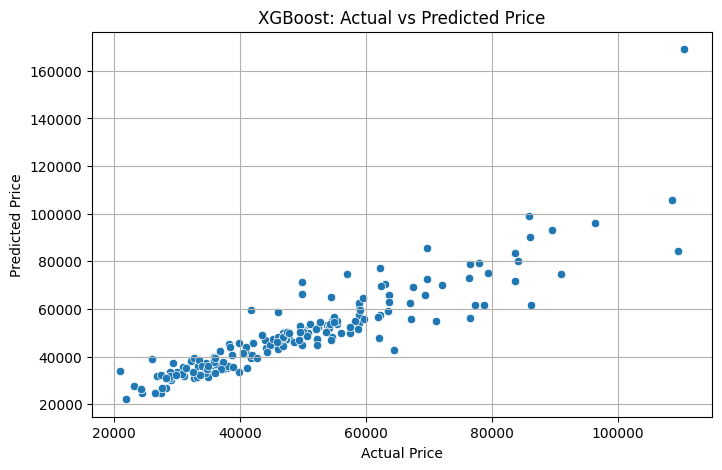

['xgboost_vehicle_price_model.pkl']

In [ ]:
# Step 5: Visualize Predictions
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBoost: Actual vs Predicted Price")
plt.grid(True)
plt.show()

# Export Predictions
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_xgb})
results_df.to_csv("vehicle_price_predictions.csv", index=False)

# Optional: Save XGBoost model
import joblib
joblib.dump(xgbr, "xgboost_vehicle_price_model.pkl")
